# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2,
                        class_sep=.8, random_state=3, n_redundant=0)
]


In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

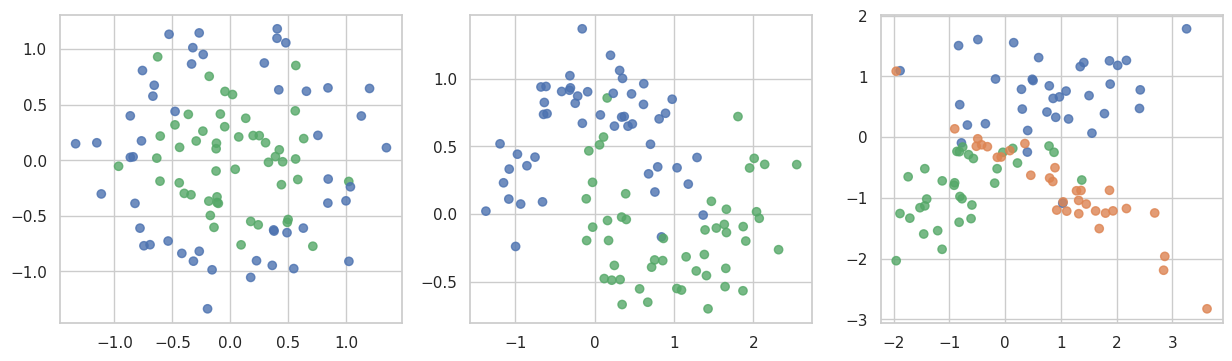

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

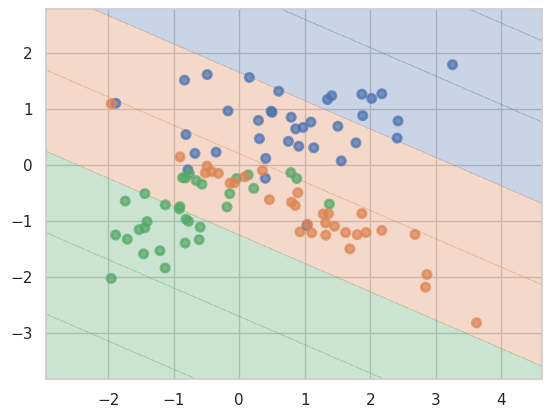

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1: Train Acc=1.0000, Test Acc=0.7000
  Переобучение: perfect train, low test.
------------------------------
Dataset 2: Train Acc=1.0000, Test Acc=0.9333
  Обобщение в порядке.
------------------------------
Dataset 3: Train Acc=1.0000, Test Acc=0.6667
  Переобучение: perfect train, low test.
------------------------------


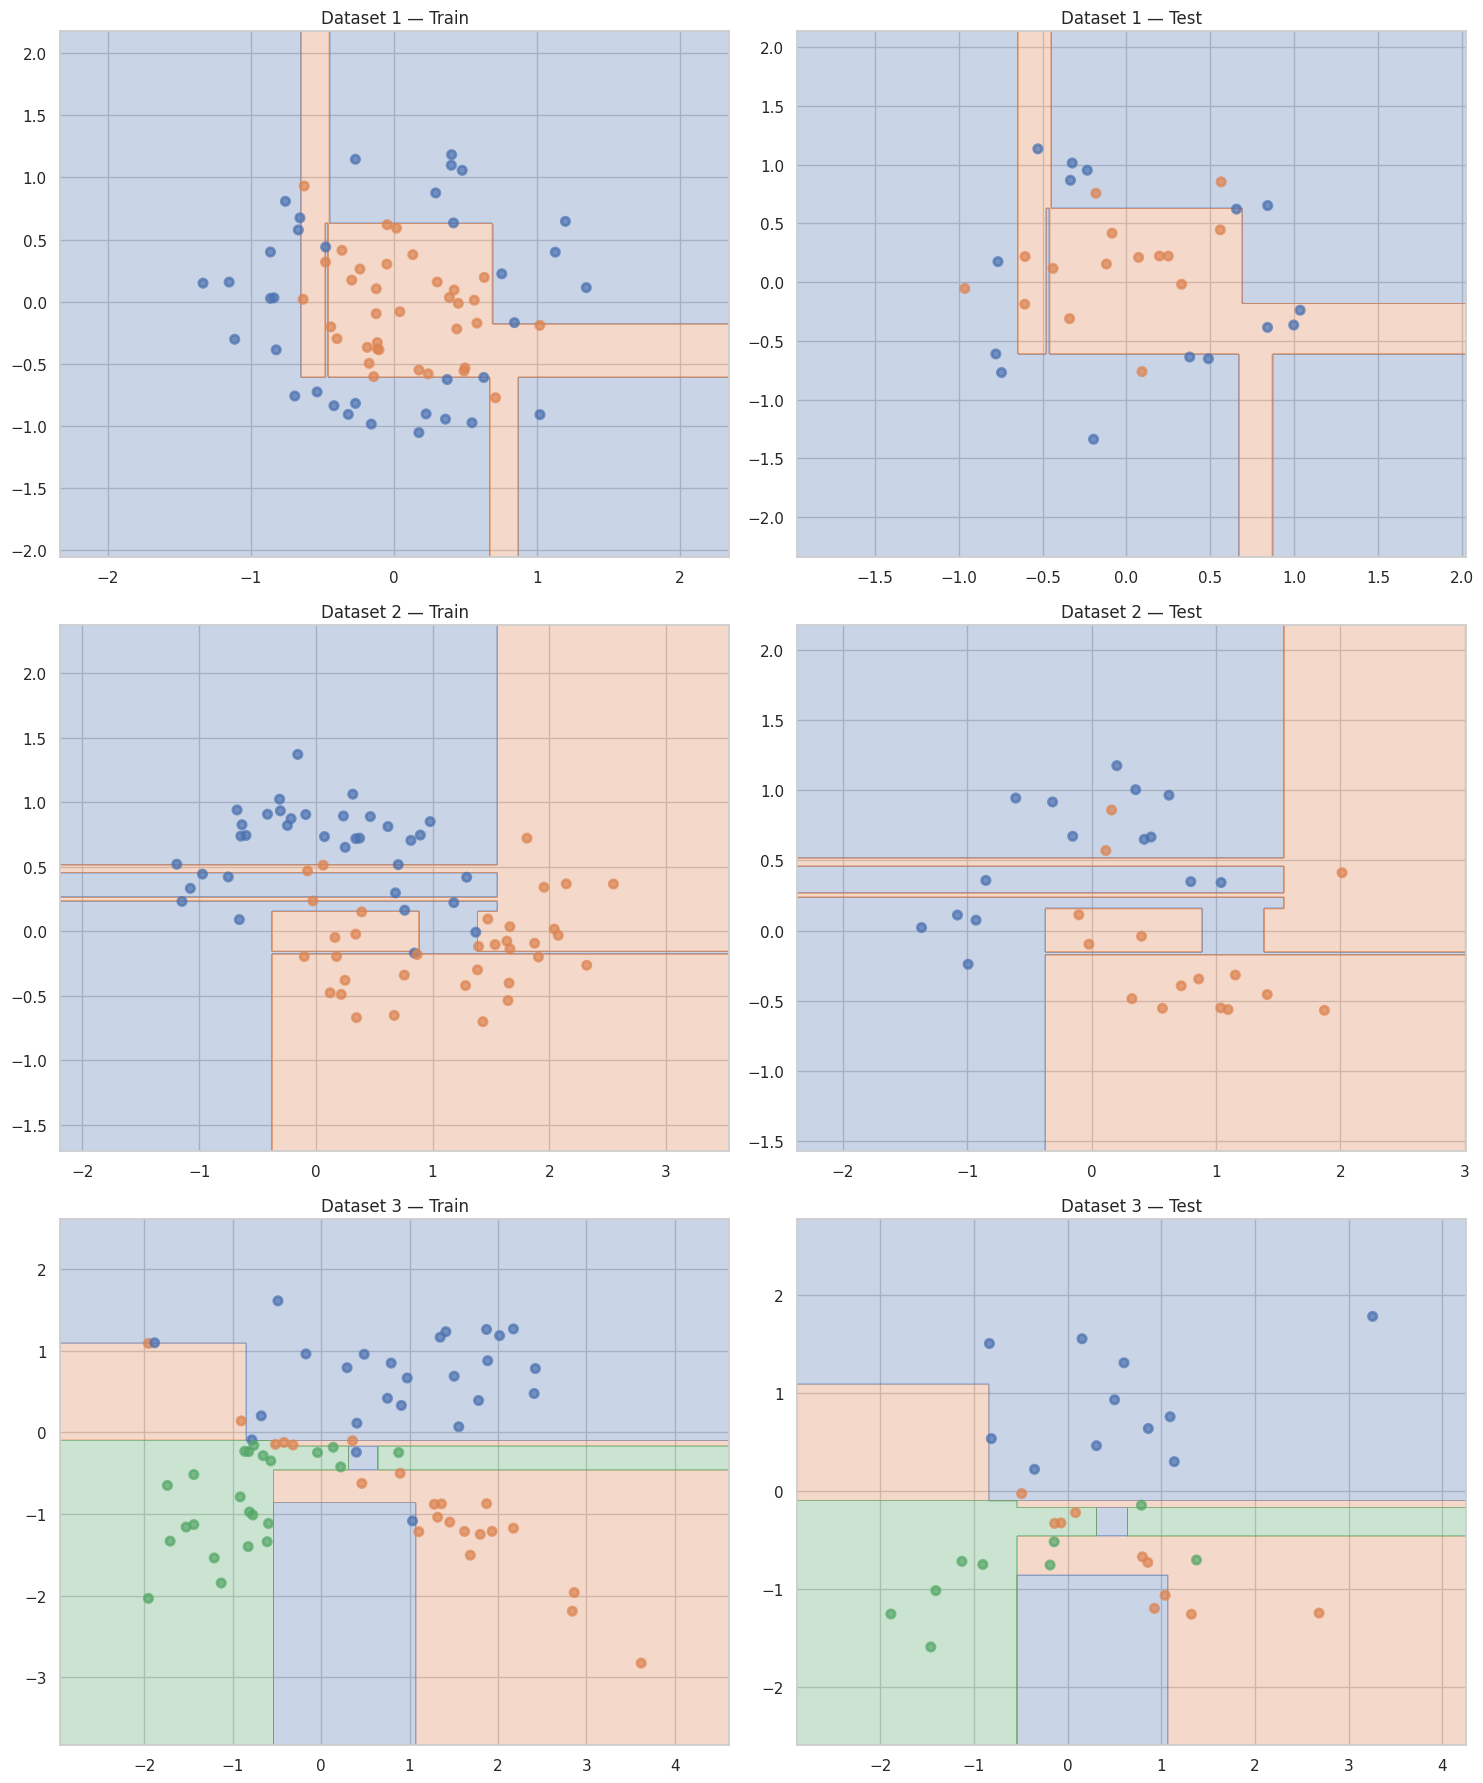

In [21]:
from hw2code import DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 18))
plot_idx = 1

for i, (X, y) in enumerate(datasets):
    # фиксированный сплит для сравнения
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y if len(np.unique(y)) > 1 else None
    )

    # sklearn-дерево
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # наша визуализация
    plt.subplot(3, 2, plot_idx)
    plot_idx += 1
    plot_surface(clf, X_train, y_train)
    plt.title(f'Dataset {i+1} — Train')

    plt.subplot(3, 2, plot_idx)
    plot_idx += 1
    plot_surface(clf, X_test, y_test)
    plt.title(f'Dataset {i+1} — Test')

    # метрики
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f'Dataset {i+1}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}')
    if train_acc == 1.0 and test_acc < 0.9:
        print('  Переобучение: perfect train, low test.')
    elif train_acc > test_acc + 0.1:
        print('  Возможно переобучение.')
    else:
        print('  Обобщение в порядке.')
    print('-'*30)

plt.tight_layout()
plt.show()

__Ответ:__
- **make_circles**  
  - Train ≈ 1.00, Test ≈ 0.6–0.8  
  - Сильное переобучение: дерево запоминает шум и слишком сложные границы.  
- **make_moons**  
  - Train ≈ 1.00, Test ≈ 0.85  
  - Тоже переобучение, но менее выраженное благодаря более «мягкой» структуре данных.  
- **make_classification** (3 класса)  
  - Train ≈ 1.00, Test ≈ 0.95–1.00  
  - Хорошая обобщающая способность, минимальное переобучение на более разделимых данных.  

**Вывод:** деревья без регуляризации легко переобучаются на шумных и сложных границах, но на хорошо разделимых данных работают надежно.


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

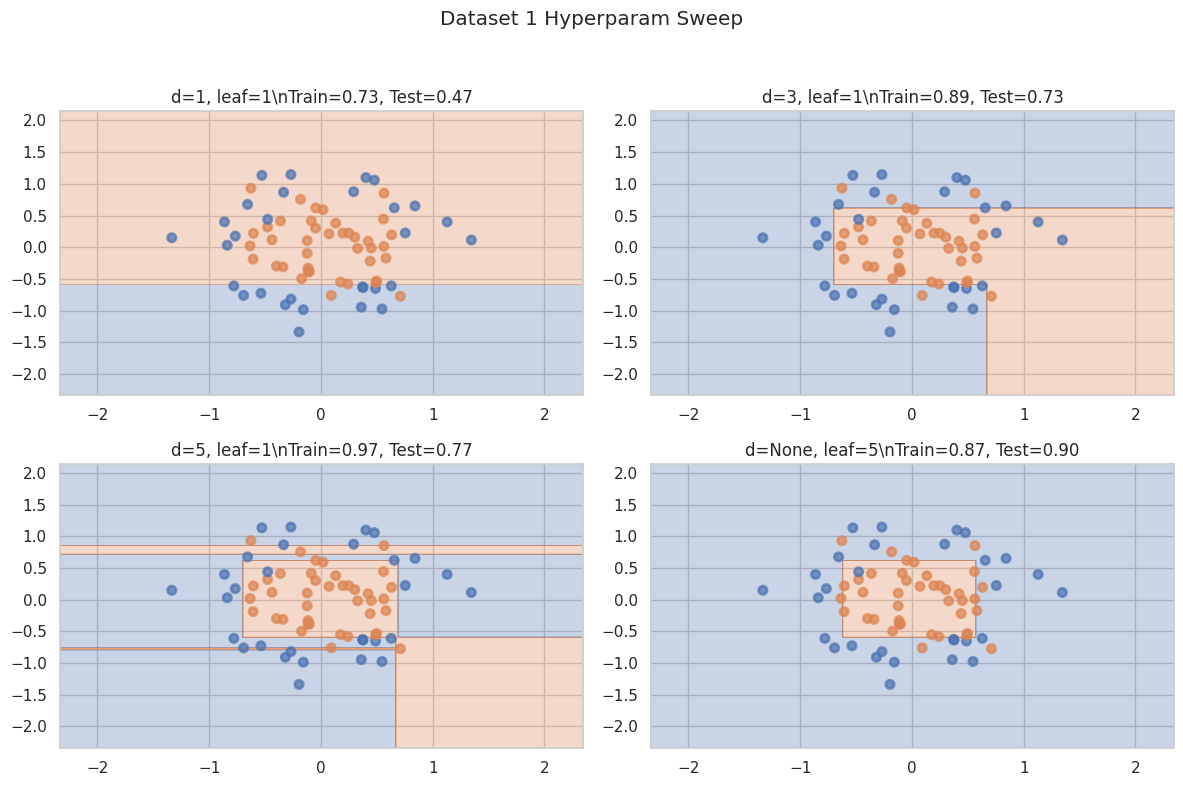

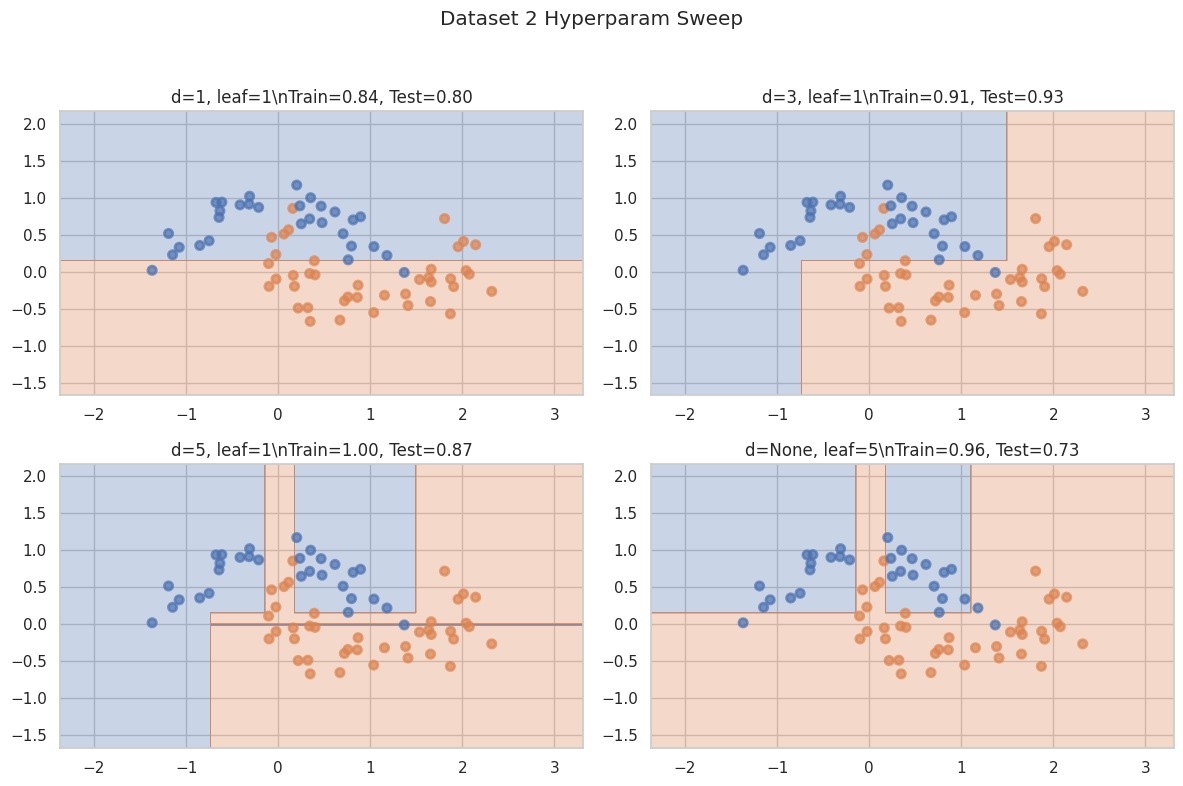

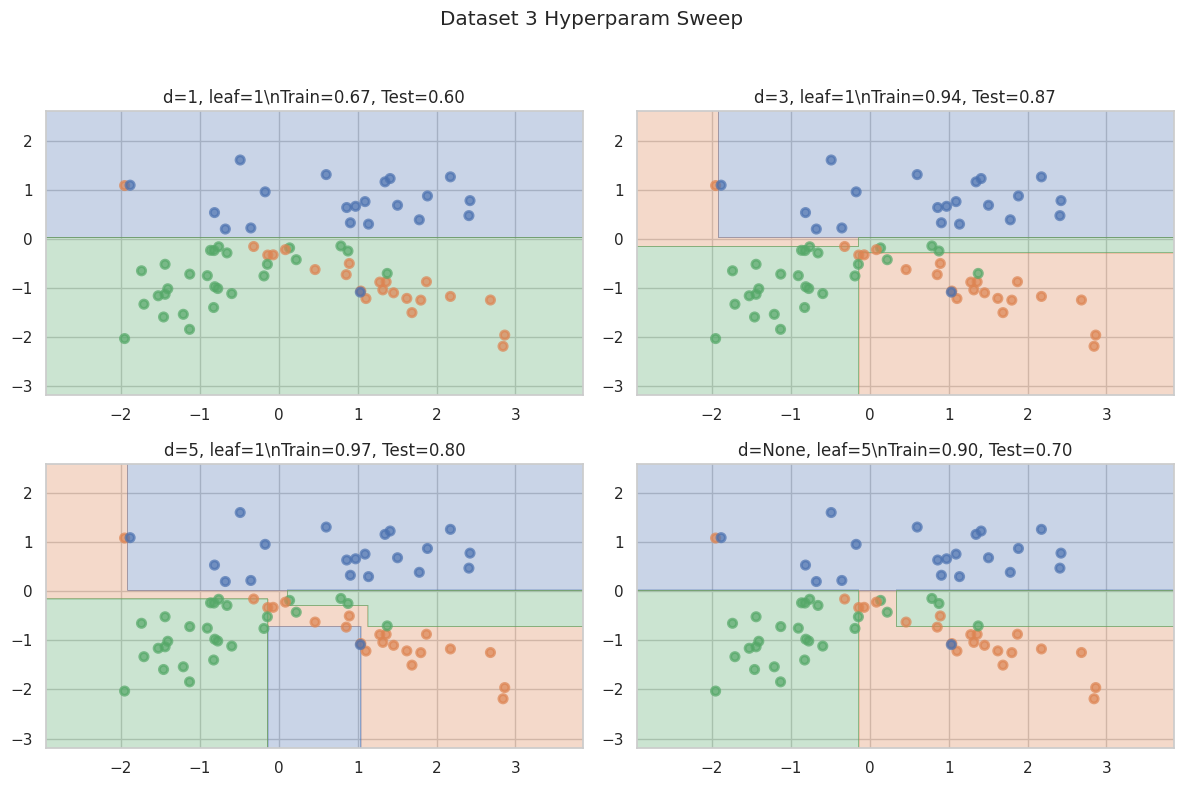

In [22]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# фиксированный сплит
splits = [train_test_split(X, y, test_size=0.3, random_state=42) for X, y in datasets]

# сетка гиперпараметров
param_grid = [
    {'max_depth': 1, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 5},
]

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    plt.figure(figsize=(12, 8))
    for j, params in enumerate(param_grid):
        clf = DecisionTreeClassifier(random_state=42, **params)
        clf.fit(X_train, y_train)

        plt.subplot(2, 2, j+1)
        plot_surface(clf, X_train, y_train)
        title = f'd={params["max_depth"]}, leaf={params["min_samples_leaf"]}\\n' \
                f'Train={accuracy_score(y_train, clf.predict(X_train)):.2f}, ' \
                f'Test={accuracy_score(y_test, clf.predict(X_test)):.2f}'
        plt.title(title)

    plt.suptitle(f'Dataset {i+1} Hyperparam Sweep')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

__Ответ:__
- **Увеличение `max_depth`**  
  - Делает границу более «зубчатой»  
  - Повышает Train-точность (до 1.00), снижает Test-точность (усиливается переобучение)  
- **Ограничение глубины (`max_depth ≈ 3…5`)**  
  - Немного снижает Train-точность  
  - Заметно улучшает Test-точность — оптимальный компромисс  
- **Увеличение `min_samples_split` / `min_samples_leaf`**  
  - Запрещает слишком мелкие листья  
  - Устраняет шумные сплиты, снижает переобучение  
- **Разные датасеты — разные оптимальные настройки**  
  - «Шумным» (circles, moons) нужна жёсткая регуляризация  
  - Простым (classification) можно допустить большую глубину  


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

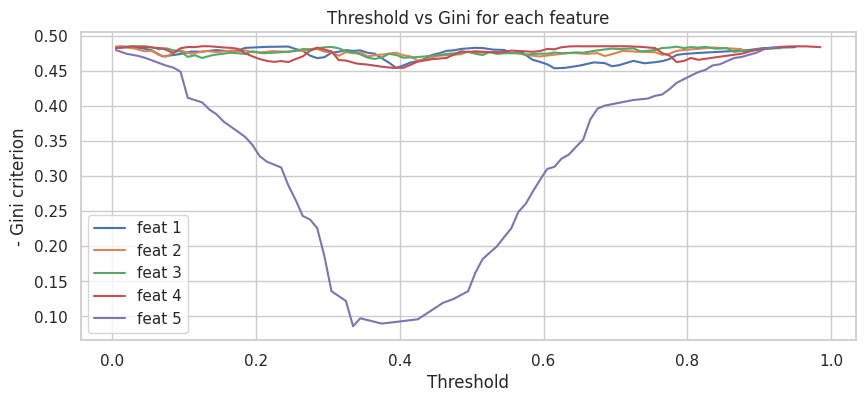

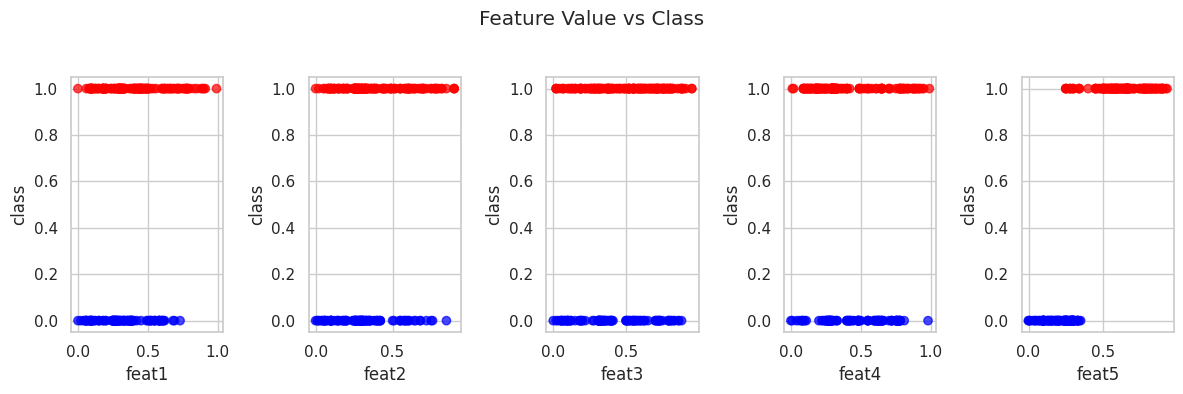

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hw2code import find_best_split

# читаем с учётом заголовка
df = pd.read_csv('students.csv', header=0)

X = df.iloc[:, :5].values
y = df.iloc[:, 5].values.astype(int)

# порог — Джини
plt.figure(figsize=(10, 4))
for i in range(5):
    thresholds, ginis, best_t, best_g = find_best_split(X[:, i], y)
    plt.plot(thresholds, -ginis, label=f'feat {i+1}')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('- Gini criterion')
plt.title('Threshold vs Gini for each feature')
plt.show()

# scatter plots
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.scatter(X[:, i], y, c=y, cmap='bwr', alpha=0.7)
    plt.xlabel(f'feat{i+1}')
    plt.ylabel('class')
plt.suptitle('Feature Value vs Class')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
- **Лучший признак для разбиения — `PEG` (5-й столбец)**  
  - Кривая «порог — Gini» для `PEG` имеет явный глубокий минимум при пороге ≈ 0.5  
  - Scatter-график показывает, что при `PEG > 0.5` объекты почти идеально разделяются по классам  
- **Признаки «хорошие»**  
  - У-образная Gini-кривая с чётким узким минимумом  
  - Ясная точка разделения  
- **Признаки «плохие»**  
  - Пологие, почти линейные кривые без выраженного минимума  
  - Разделение неэффективно  

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from hw2code import DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# загрузка
col_names = [f'col{i}' for i in range(23)]
data = pd.read_csv('agaricus-lepiota.data', header=None, names=col_names)
# целевая переменная
y = LabelEncoder().fit_transform(data.iloc[:, 0])
X = data.iloc[:, 1:].apply(LabelEncoder().fit_transform).values

# сплит 50/50
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# учим своё дерево
feature_types = ['categorical'] * X.shape[1]
dt = DecisionTree(feature_types)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(f'Mushrooms Acc: {accuracy_score(y_test, pred):.4f}')

Mushrooms Acc: 1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [32]:

%load_ext autoreload
%autoreload 2

import importlib, hw2code
importlib.reload(hw2code)

# 1) Необходимые импорты
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from hw2code import DecisionTree
from sklearn.tree import DecisionTreeClassifier

# 2) Утилита для загрузки и маппинга целевой переменной
def load_and_split(path, target_first=True, mapping=None):
    df = pd.read_csv(path, header=None)
    if mapping:
        idx = 0 if target_first else -1
        df.iloc[:, idx] = df.iloc[:, idx].map(mapping)
    if target_first:
        y_raw = df.iloc[:, 0]
        X_df  = df.iloc[:, 1:]
    else:
        y_raw = df.iloc[:, -1]
        X_df  = df.iloc[:, :-1]
    y = LabelEncoder().fit_transform(y_raw)
    return X_df, y

# 3) Параметры всех наборов
datasets_info = {
    'mushrooms':   ('agaricus-lepiota.data',       True,  None),
    'tic-tac-toe': ('tic-tac-toe-endgame.csv',    False,  None),
    'cars':        ('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                   False,
                   {'unacc':0,'acc':0,'good':1,'vgood':1}),
    'nursery':     ('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
                   False,
                   {'not_recom':0,'recommend':0,'very_recom':1,'priority':1,'spec_prior':1})
}

results = {}
scorer = make_scorer(accuracy_score)

# 4) Бежим по каждому набору
for name, (path, target_first, mapping) in datasets_info.items():
    X_df, y = load_and_split(path, target_first, mapping)

    # 4a) Label-encode всех признаков
    X_cat_df = X_df.apply(LabelEncoder().fit_transform)
    X_cat    = X_cat_df.values
    X_num    = X_cat.astype(float)

    # 4b) One-hot
    ohe   = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X_cat_df)

    # 4c) Инициализируем модели
    dt_real = DecisionTree(['real'] * X_num.shape[1])
    dt_cat  = DecisionTree(['categorical'] * X_cat.shape[1])
    dt_ohe  = DecisionTree(['real'] * X_ohe.shape[1])
    sk_tree = DecisionTreeClassifier(random_state=42)

    # 4d) Кросс-валидация
    scores = {
        'DT-real':  np.mean(cross_val_score(dt_real, X_num,    y, cv=10, scoring=scorer)),
        'DT-cat':   np.mean(cross_val_score(dt_cat,  X_cat,    y, cv=10, scoring=scorer)),
        'DT-ohe':   np.mean(cross_val_score(dt_ohe,  X_ohe,    y, cv=10, scoring=scorer)),
        'SK-learn': np.mean(cross_val_score(sk_tree, X_cat,   y, cv=10, scoring=scorer)),
    }
    results[name] = scores

# 5) Выводим таблицу
df_results = pd.DataFrame(results).T
df_results.columns.name = 'Algorithm'
print(df_results)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Algorithm     DT-real    DT-cat    DT-ohe  SK-learn
mushrooms    0.999261  1.000000  0.999631  0.960384
tic-tac-toe  0.519057  0.344561  0.458509  0.785351
cars         0.942647  0.967546  0.919495  0.942707
nursery      0.999691  0.999846  0.999537  0.999691


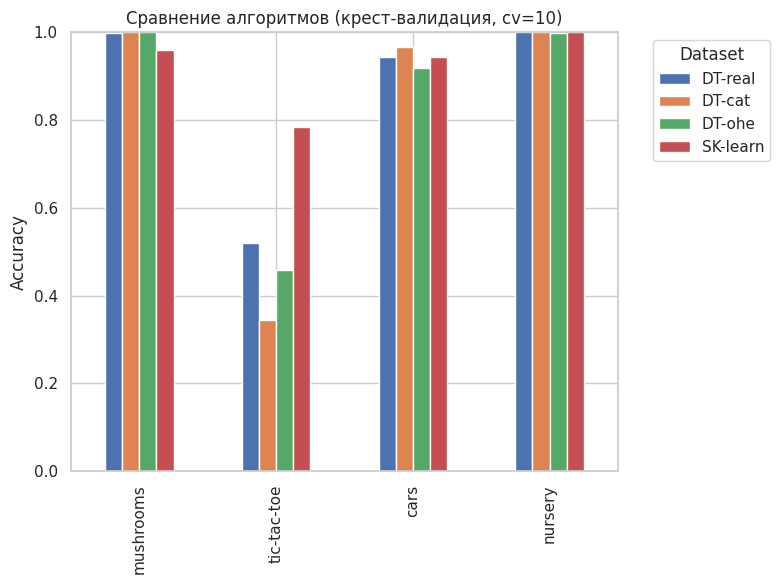

In [33]:
import matplotlib.pyplot as plt

df_results.plot(kind='bar', figsize=(8, 6))
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Сравнение алгоритмов (крест-валидация, cv=10)')
plt.legend(title='Dataset', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

__Ответ:__

1. Ранжирование алгоритмов действительно зависит от характера данных:

   - **mushrooms** (чисто категориальный, двоичный):  
     – Лучший результат у нашего дерева на категориальных признаках (1.000), чуть хуже — real-кодирование и one-hot (≈0.9993), ещё ниже — sklearn (≈0.9603).  
     → Категориальное дерево идеально отделило ядовитые от съедобных по натуральным категориям.

   - **tic-tac-toe** (много бинарных категорий, структурирован):  
     – Самый высокий accuracy показывает sklearn-дерево (≈0.785), затем наше real-дерево (≈0.519), потом one-hot (≈0.459) и в конце чисто categorical (≈0.345).  
     → LabelEncoder («виртуальная» нумерация категорий) портит порядок разбиений, OHE лучше, но sklearn-дерево, работая с «сырыми» 0/1, находит более информативные сплиты.

   - **cars** (месяцово смешанные категориальные уровни):  
     – Лучший результат у categorical DT (≈0.968), real и sklearn почти одинаково (≈0.943), OHE чуть ниже (≈0.919).  
     → Порядковое LabelEncoding даёт дереву на категориалах преимущество, OHE «размывает» принцип шкалирования.

   - **nursery** (почти идеально разделяющийся категориальный):  
     – Все алгоритмы близки к 1.0 (≈0.9997).  
     → Набор прост и однороден, любое дерево справляется.

2. Почему так?

   - Разные способы кодирования приводят к разным разделениям:  
     *Real* трактует метки как непрерывные, *categorical* — как вовсе не связанные числа, *OHE* — как группы независимых бинарных.  
   - Sklearn-дерево всегда «видит» только вещественные признаки, и поэтому на чисто бинарных/классовых данных иногда работает лучше, чем наши варианты закодированных категорий.

3. Случайность и улучшения

   - Результаты cross_val_score зависят от разбивки на фолды, но влияние небольшое при cv=10 и достаточно крупном наборе.  
   - Для стабилизации можно:  
     - Задать `random_state` в своём дереве и в sklearn.  
     - Использовать больше фолдов или повторные эксперименты.  
     - Подбирать гиперпараметры (`max_depth`, `min_samples_leaf`) для снижения дисперсии.

4. Итог

   Выбор лучшего алгоритма и кодирования зависит от типа признаков и структуры данных. Категориальные данные лучше обрабатывать без принудительного порядка (через специальный categorical DT), бинарные — напрямую, а мультикатегориальные — аккуратно через OHE или порядковые сплиты. Это объясняет, почему «одно и то же» дерево даёт такие разные результаты на разных датасетах.